In [213]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [214]:
pca = "pca.european.tsv" # use pca.tsv for all samples
igsr_data = "igsr_samples.tsv"
sample_weights = "GFX0224931.european.weights" # use GFX0224931.weights for projection across all samples

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='PC 1', ylabel='PC 2'>

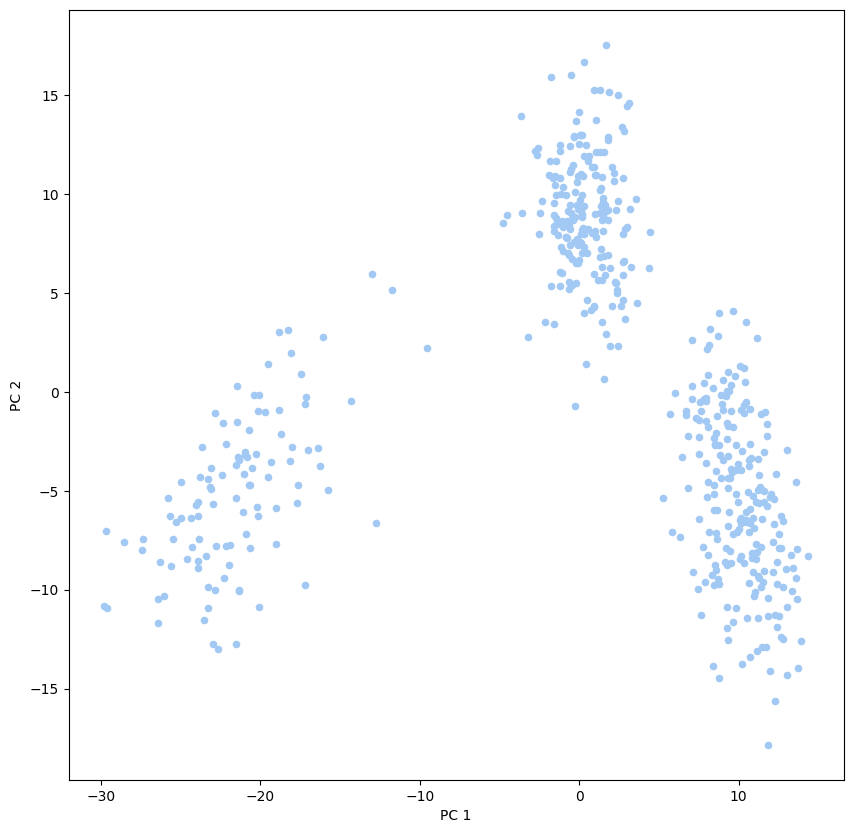

In [215]:

columns = ['Sample']

for i in range(1, 21):
    columns.append('PC {}'.format(i))

df = pd.read_csv(pca, delim_whitespace=True, header=0, names=columns, index_col=0)

df[['PC 1', 'PC 2']].plot.scatter(x='PC 1', y='PC 2', figsize=(10, 10))

In [216]:
plt.savefig('pca.png')


<Figure size 640x480 with 0 Axes>

In [217]:
igsr_data = pd.read_csv(igsr_data, sep='\t', header=0, index_col=0)

igsr_data

,Sex,Biosample ID,Population code,Population name,Superpopulation code,Superpopulation name,Population elastic ID,Data collections
Sample name,,,,,,,,
HG00271,male,SAME123417,FIN,Finnish,EUR,European Ancestry,FIN,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
HG00276,female,SAME123424,FIN,Finnish,EUR,European Ancestry,FIN,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
HG00288,female,SAME1839246,FIN,Finnish,EUR,European Ancestry,FIN,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
HG00290,male,SAME1839057,FIN,Finnish,EUR,European Ancestry,FIN,"1000 Genomes on GRCh38,1000 Genomes 30x on GRC..."
HG00303,male,SAME1840115,FIN,Finnish,EUR,European Ancestry,FIN,1000 Genomes on GRCh38
...,...,...,...,...,...,...,...,...
HGDP00773,female,SAMEA3302906,NaN,Japanese,NaN,East Asia (SGDP),JapaneseSGDP,Simons Genome Diversity Project
R3,male,SAMEA3302714,NaN,Relli,NaN,South Asia (SGDP),RelliSGDP,Simons Genome Diversity Project
NA12236,female,SAMEA6604124,CEU,CEPH,EUR,European Ancestry,CEU,1000 Genomes 30x on GRCh38


In [218]:
df['Population'] = [igsr_data.loc[sample]['Population name'] for sample in df.index]
df['Superpopulation'] = [igsr_data.loc[sample]['Superpopulation name'] for sample in df.index]

df = df[df['Population'].str.contains(',') == False]

df

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10,...,PC 13,PC 14,PC 15,PC 16,PC 17,PC 18,PC 19,PC 20,Population,Superpopulation
Sample,,,,,,,,,,,,,,,,,,,,,
HG00099,0.309752,11.91230,-14.013900,2.81441,-4.097080,-2.18826,-1.081790,12.829600,-10.904900,-2.52668,...,-3.16761,15.842500,7.607470,13.085000,6.499750,7.091070,7.542850,-0.374223,British,European Ancestry
HG00100,2.697210,13.35290,-18.969800,6.52396,-1.565300,0.45942,0.495335,-11.410900,-4.281000,-4.38147,...,-7.57735,21.613700,-0.214621,-5.458120,2.220920,-4.962000,-8.972630,13.471800,British,European Ancestry
HG00101,1.883820,15.16870,2.388090,2.82673,-3.067700,-1.47997,-3.095090,-7.241450,6.766700,-3.26831,...,-1.53669,11.051200,7.542120,-4.735330,-0.268290,6.817710,-5.341070,8.892330,British,European Ancestry
HG00102,0.009022,14.15630,-8.688280,4.73474,1.784200,-3.15963,-2.924800,-0.276527,-2.467260,2.00843,...,-3.34777,9.757240,3.879370,2.813270,4.817180,-0.422400,5.992440,-0.445545,British,European Ancestry
HG00103,-0.016597,12.51970,-4.684230,-6.69784,-0.980849,11.27180,-2.411530,6.398660,0.644918,1.72117,...,-6.53467,1.503190,2.084600,11.259800,2.934980,10.354200,3.420450,2.703600,British,European Ancestry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NA20827,11.425400,-9.86992,3.474030,1.13941,-8.832260,7.03770,-2.061620,0.233544,4.093050,11.63740,...,3.85466,3.615890,-6.441940,-4.751610,-3.198310,10.357300,0.100475,12.423100,Toscani,European Ancestry
NA20828,12.273600,-11.29980,3.210740,-4.30250,-7.141400,12.42100,2.222250,0.276298,-9.101330,-3.98495,...,-9.39178,4.456860,-0.040394,0.592195,0.609365,-0.183521,6.053490,1.032110,Toscani,European Ancestry
NA20829,11.085500,-8.45635,0.645307,3.18303,-7.097030,3.11240,7.447840,-3.562860,0.866030,-9.03775,...,2.83038,1.662080,4.296630,2.863520,-6.006810,14.174400,1.385440,-0.044449,Toscani,European Ancestry


In [219]:
df['Population'].value_counts()

Toscani    111
Iberian    104
Finnish    102
CEPH        99
British     96
Name: Population, dtype: int64

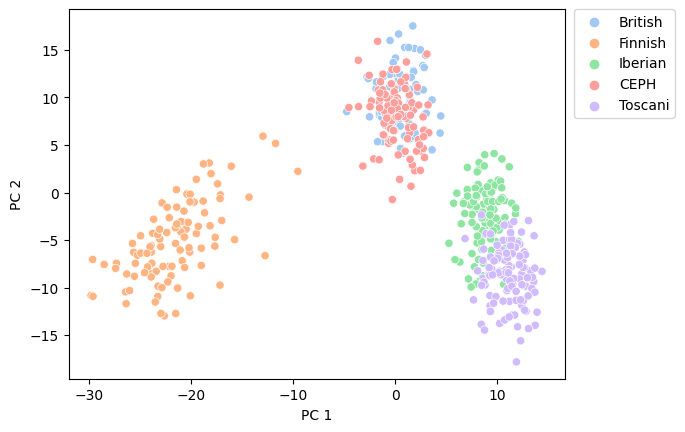

In [220]:
sns.set_palette("pastel")

sns.scatterplot(x = 'PC 1', y =  'PC 2', data=df, hue='Population')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)



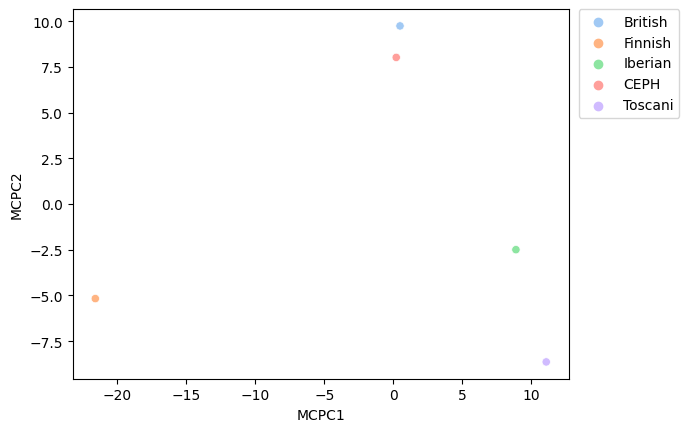

In [221]:
# Create data frame for each population
populations = pd.DataFrame(df['Population'].unique(), columns=['Population'], index=df['Population'].unique())

# Add mean centering 
populations['MCPC1'] = [df[df['Population'] == population]['PC 1'].mean() for population in populations.index]
populations['MCPC2'] = [df[df['Population'] == population]['PC 2'].mean() for population in populations.index]


sns.scatterplot(x = 'MCPC1', y =  'MCPC2', data=populations, hue='Population')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.savefig('mean_centered_pca.png')


In [222]:
import os

file = open(sample_weights)
lines = file.readlines()

first_line = lines[0].split()

pc1 = float(first_line[1])
pc2 = float(first_line[2])

print(pc1, pc2)




0.758484 2.53192


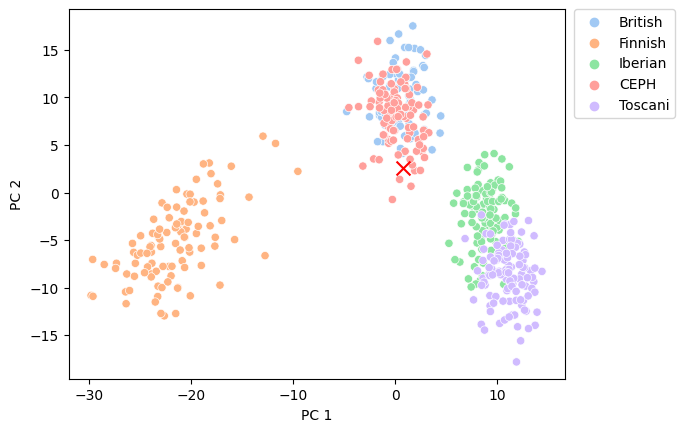

In [223]:
# Plot the first two principal components colored by population
sns.set_palette("pastel")


sns.scatterplot(x = 'PC 1', y =  'PC 2', data=df, hue='Population')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.scatter(pc1, pc2, color='red', s=100, marker='x')
plt.savefig("superpopulations.png")

## Calculate delta between all populations and the target population


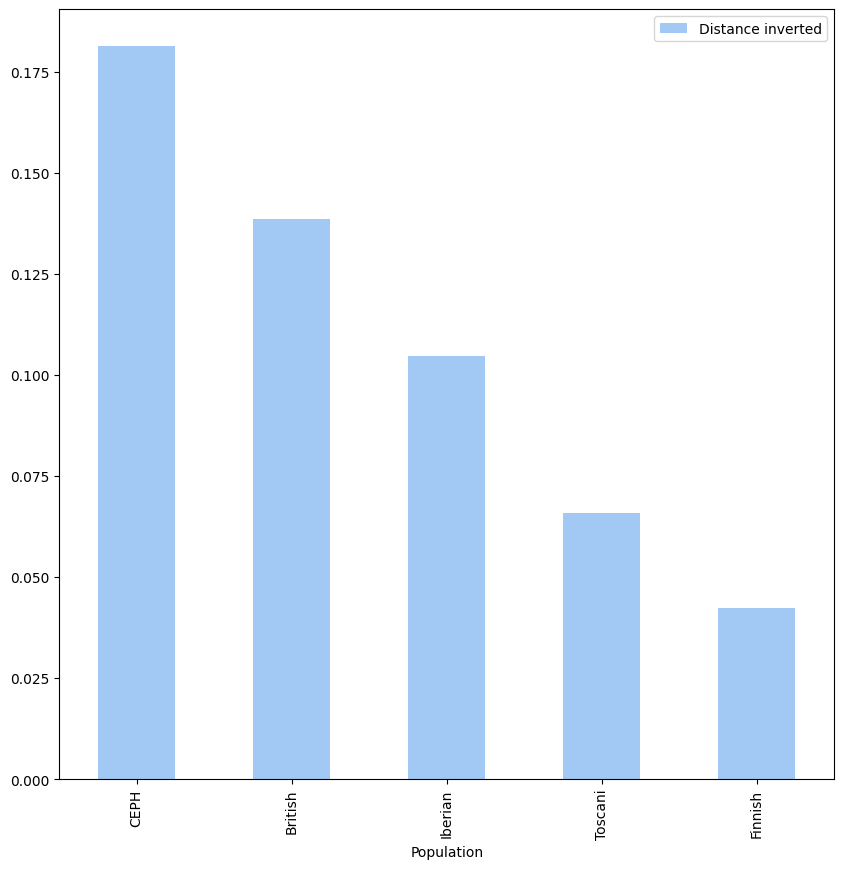

In [224]:
import numpy as np

# Calculate the distance between the query and each population
populations['Distance'] = [np.sqrt((pc1 - populations.loc[population]['MCPC1'])**2 + (pc2 - populations.loc[population]['MCPC2'])**2) for population in populations.index]
populations['Distance inverted'] = 1/(populations['Distance'])
populations.sort_values(by='Distance inverted', ascending=False).plot.bar(y='Distance inverted', x='Population', figsize=(10, 10))
plt.savefig('distance.png')

## List of samples within the european superpopulation

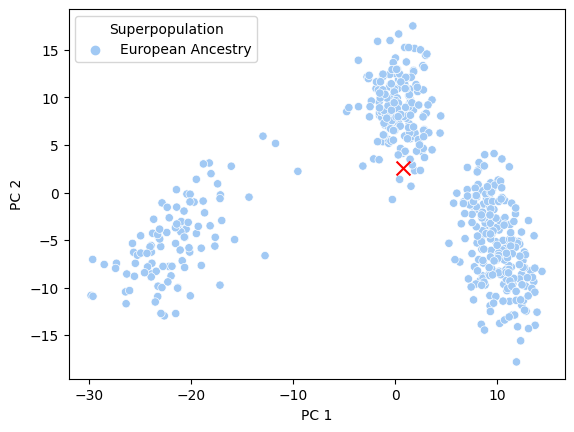

In [225]:

#sns.scatterplot(x = 'MCPC1', y =  'MCPC2', data=populations, hue='Population')

european = df[df["Superpopulation"].str.startswith("European")]
sns.scatterplot(x = "PC 1", y = "PC 2", data=european, hue="Superpopulation")

plt.scatter(pc1, pc2, color='red', s=100, marker='x')
